chap16 이미지 인식, CNN


In [10]:
# %load deep_module.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout,MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [27]:
# mnist datasets를 load
(X_train,y_train),(X_test,y_test)=mnist.load_data()

#X_train의 shape을 확인
print(X_train.shape)

(60000, 28, 28)


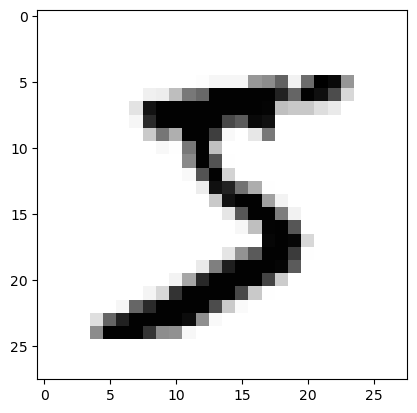

In [28]:
# X_train[0] -> 자료 확인
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [29]:
# 데이터 확인
for X in X_train[0]:
    for i in X:
        print('{:3d}'.format(i), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [30]:
    
# 데이터를 정규화
print(X_train.dtype)  # 데이터 타입 int8

# 0~ 255 사이의 수를 0~1 수로 정규화
# 1. 데이터 타입을 float 형으로 변경ㅇ 후 255로 나눔
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

print(np.unique(y_train))

uint8
[0 1 2 3 4 5 6 7 8 9]


In [33]:
# 컨볼루션 신경망 설정
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1),
                activation='relu'))
model.add(Conv2D(64, (3,3),padding='same' ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0,25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                      

In [36]:
# 모델의 실행 옵션
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# 모델의 최적화 설정
modelpath='./data/model/mnist_cnn.hdf5'
checkpointer=ModelCheckpoint(filepath=modelpath, moniter='val_loss',
                            save_best_only=True, verbose=0,)
early_stopping=EarlyStopping(monitor='val_loss',patience=10)

# 모델 학습 실행
history=model.fit(X_train, y_train, validation_split=0.25, epochs=1000,
                 batch_size=200, verbose=0, callbacks=[early_stopping, checkpointer])

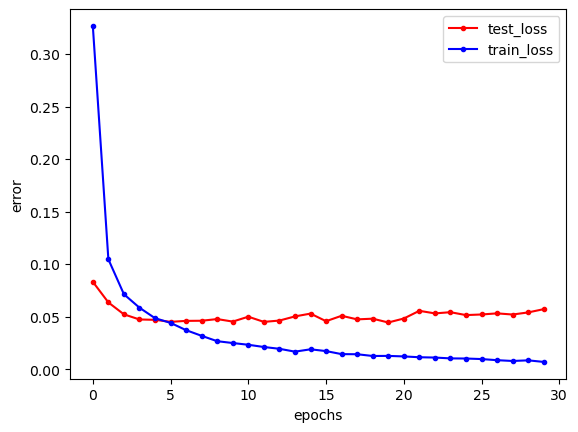

In [39]:
# 검증셋과 학습셋의 오차를 저장
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

# 그래프로 표현
X_len=np.arange(len(y_loss))
plt.plot(X_len, y_vloss, marker='.', c='red', label='test_loss')
plt.plot(X_len, y_loss, marker='.', c='blue', label='train_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('error')
plt.show()

In [40]:
# 학습 정확도와 검증정확도, 테스트 정확도 출력
print('학습 정확도 : ', history.history['accuracy'][-1])
print('검증 정확도 : ', history.history['val_accuracy'][-1])
print('테스트 정확도 : ', model.evaluate(X_test,y_test)[1])

학습 정확도 :  0.9975777864456177
검증 정확도 :  0.9892666935920715
313/313 [==============================] - 22s 66ms/step - loss: 0.0368 - accuracy: 0.9921
테스트 정확도 :  0.9921000003814697
